In [115]:
%run helper_function.ipynb
%run CLUSTERS.ipynb
%run ENCODERS.ipynb
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The data is categorized into three different group, which they have different input shape:

Shape 1: flat - 784 (For Flat Model)
<br>
Shape 2: 2D - 28 x 28 (Original)
<br>
Shape 3: 3D - 28 x 28 x 1 (For Conv Model)

In [2]:
X_train,y_train = get_data('train')
X_test,y_test = get_data('test')

X_train_model1 = norm_flat_data(X_train)
X_test_model1 = norm_flat_data(X_test)
X_train_model2 = norm_conv_data(X_train)
X_test_model2 = norm_conv_data(X_test)

The following are the hyper parameters:

the number of clusters - 10
<br>
The input shape for Flat Model - Shape 1
<br>
The input shape for Conv Model - Shape 3
<br>
The original shape of input - Shape 2
<br>
epochs - 10
<br>
activation function - sigmoid
<br>
batch size - 128

In [9]:
n_clusters = 10
flat_input_shape = X_train_model1.shape[1]
img_shape_2d = X_train[0].shape
conv_input_shape = X_train_model2[0].shape
epochs = 10
activation='sigmoid'
batch_size = 128

The following classes are:
<br>
1. clusters: This class builds two different clustering model K-Means and Gaussian Mixture Model, and implements their functions accordingly
<br>
2. encoders: This class builds two different auto-encoder model: one with dense layers only, and one with Conv layers only

In [4]:
clusters = CLUSTERS(n=n_clusters)
encoders = ENCODERS(flat_input_shape,conv_input_shape,epochs,activation,batch_size)

The following is the architecture of both Flat Model and Conv Model

In [5]:
encoders.__model_summary__('flat')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 784)               101136    
Total params: 222,352
Trainable params: 222,352
Non-trainable params: 0
_______________________________________________________

In [11]:
encoders.__model_summary__('conv')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 4)         292       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 4)           148       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 4)         0   

<br>
<br>
<br>
<br>
Training Both Models

In [7]:
encoders.__train__(X_train_model1,X_train_model1,'flat')
encoders.__train__(X_train_model2,X_train_model2,'conv')

Training...
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3420 - accuracy: 0.4973
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2974 - accuracy: 0.5064
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2902 - accuracy: 0.5073
Epoch 4/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2861 - accuracy: 0.5078
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2832 - accuracy: 0.5080
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2812 - accuracy: 0.5082
Epoch 7/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2797 - accuracy: 0.5084
Epoch 8/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2783 - accuracy: 0.5085
Epoch 9/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2773 - accuracy: 0.5086
E

<br>
The training ended with both models' accuracy barely passing over 50%, and have remained constant
<br>

<br>
<br>
<br>
<br>
These dataset are either encoded or decoded from both models

In [12]:
encoded_data_model1 = encoders.__get_encoded_data__(X_train_model1,'flat')
decoded_data_model1 = encoders.__get_decoded_data__(X_train_model1,'flat')

encoded_data_model2 = encoders.__get_encoded_data__(X_train_model2,'conv')
decoded_data_model2 = encoders.__get_decoded_data__(X_train_model2,'conv')

To test the accuracy / quality of the model, the original inputs and the decoded inputs are compared.
<br>
The following are 10 random original on the top line and the matching decoded data from Flat Model

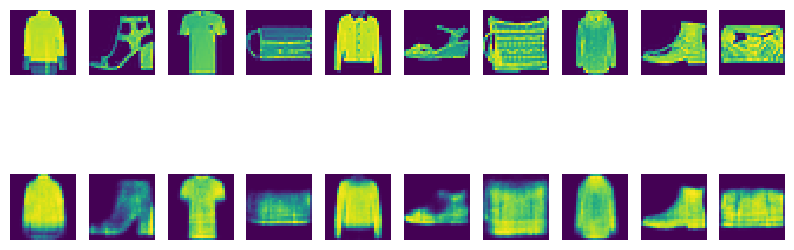

In [13]:
encoders.__compare_original_decoded__(X_train_model1,decoded_data_model1,10)

<br>
The following are 10 random original images on the top line and the matching decoded data from Conv Model
<br>

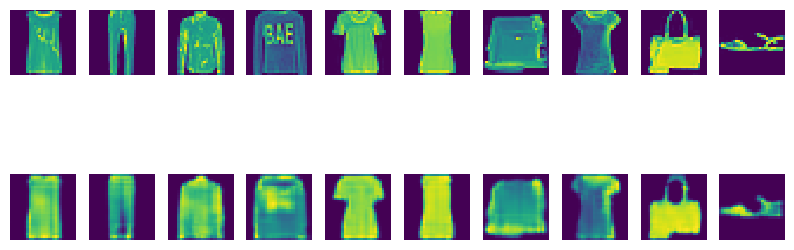

In [14]:
encoders.__compare_original_decoded__(X_train_model2,decoded_data_model2,10)

In [15]:
clusters.__fit__(X_train_model1,'kmeans')

In [16]:
pred = clusters.__predict__(X_train_model1, 'kmeans')

The following cell is a section where the user can test the label matching.
<br>
Since K-Means model does not know which label belongs to which data, it is mandatory to play around with the label.
<br>

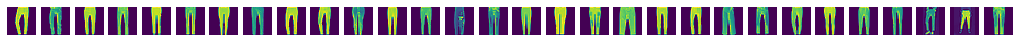

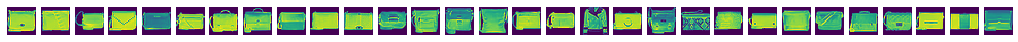

In [36]:
a = 1
b = 9

d = 30

l = 2000
h = 5000

m = 0
plt.figure(figsize=(18,12))
for i in range(l,h):
    if y_train[i] == a:
        ax = plt.subplot(2,d,m+1)
        plt.imshow(X_train[i])
        ax.set_axis_off()
        m += 1
    if m == d:
        break
plt.show()

m = 0
plt.figure(figsize=(18,12))
for i in range(l,h):
    if pred[i] == b:
        ax = plt.subplot(2,d,m+1)
        plt.imshow(X_train[i])
        ax.set_axis_off()
        m += 1
    if m == d:
        break
plt.show()

<br>
When the labels are determined, we convert the predicted label to the corresponding labels
<br>

In [37]:
mod_pred = []
for i in pred:
    if i == 0:
        mod_pred.append(0)
    elif i == 1:
        mod_pred.append(5)
    elif i == 2:
        mod_pred.append(8)
    elif i == 3:
        mod_pred.append(1)
    elif i == 4:
        mod_pred.append(7)
    elif i == 5:
        mod_pred.append(9)
    elif i == 6:
        mod_pred.append(9)
    elif i == 7:
        mod_pred.append(4)
    elif i == 8:
        mod_pred.append(6)
    elif i == 9:
        mod_pred.append(8)

In [181]:
loss = get_loss(y_train,mod_pred)
accuracy = get_accuracy(y_train,mod_pred)

In [182]:
loss

'Loss: 26780'

In [183]:
accuracy

'Accuracy: 0.5536666666666666'

=========================================================================================
<br><br>
The following code from this points will be Testing Section
<br>
Both Flat Model and Conv Model will be tested with both K-Means and Gaussian Mixture Model
<br>
The procesures will be the same as what we did above with regular K-Means Clustering
<br><br>

=========================================================================================

The datailed results will be presented on the report

In [43]:
encoded_test_data = encoders.__get_encoded_data__(X_test_model1,'flat')
decoded_test_data = encoders.__get_decoded_data__(X_test_model1,'flat')

In [44]:
clusters = CLUSTERS(n=n_clusters)

In [45]:
clusters.__fit__(encoded_test_data,'kmeans')

In [46]:
enc_pred = clusters.__predict__(encoded_test_data,'kmeans')

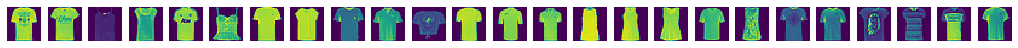

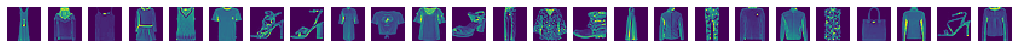

In [74]:
a = 0
b = 1

d = 25

l = 5000
h = 10000

m = 0
plt.figure(figsize=(18,12))
for i in range(l,h):
    if y_test[i] == a:
        ax = plt.subplot(2,d,m+1)
        plt.imshow(X_test[i])
        ax.set_axis_off()
        m += 1
    if m == d:
        break
plt.show()

m = 0
plt.figure(figsize=(18,12))
for i in range(l,h):
    if enc_pred[i] == b:
        ax = plt.subplot(2,d,m+1)
        plt.imshow(X_test[i])
        ax.set_axis_off()
        m += 1
    if m == d:
        break
plt.show()

In [78]:
enc_mod_pred = []
for i in enc_pred:
    if i == 0:
        enc_mod_pred.append(4)
    elif i == 1:
        enc_mod_pred.append(0)
    elif i == 2:
        enc_mod_pred.append(5)
    elif i == 3:
        enc_mod_pred.append(7)
    elif i == 4:
        enc_mod_pred.append(1)
    elif i == 5:
        enc_mod_pred.append(9)
    elif i == 6:
        enc_mod_pred.append(6)
    elif i == 7:
        enc_mod_pred.append(8)
    elif i == 8:
        enc_mod_pred.append(0)
    elif i == 9:
        enc_mod_pred.append(9)

In [79]:
enc_loss = get_loss(y_test,enc_mod_pred)

In [80]:
enc_loss

'Loss: 5188'

In [81]:
enc_accuracy = get_accuracy(y_test,enc_mod_pred)

In [82]:
enc_accuracy

'Accuracy: 0.4812'

In [83]:
clusters.__fit__(encoded_test_data,'gmm')

In [84]:
gmm_pred = clusters.__predict__(encoded_test_data,'gmm')

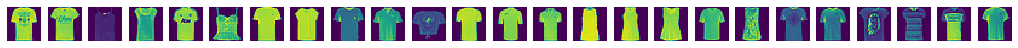

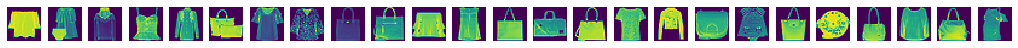

In [101]:
a = 0
b = 8

d = 25

l = 5000
h = 10000

m = 0
plt.figure(figsize=(18,12))
for i in range(l,h):
    if y_test[i] == a:
        ax = plt.subplot(2,d,m+1)
        plt.imshow(X_test[i])
        ax.set_axis_off()
        m += 1
    if m == d:
        break
plt.show()

m = 0
plt.figure(figsize=(18,12))
for i in range(l,h):
    if gmm_pred[i] == b:
        ax = plt.subplot(2,d,m+1)
        plt.imshow(X_test[i])
        ax.set_axis_off()
        m += 1
    if m == d:
        break
plt.show()

In [102]:
gmm_mod_pred = []
for i in gmm_pred:
    if i == 0:
        gmm_mod_pred.append(8)
    elif i == 1:
        gmm_mod_pred.append(0)
    elif i == 2:
        gmm_mod_pred.append(5)
    elif i == 3:
        gmm_mod_pred.append(4)
    elif i == 4:
        gmm_mod_pred.append(7)
    elif i == 5:
        gmm_mod_pred.append(9)
    elif i == 6:
        gmm_mod_pred.append(3)
    elif i == 7:
        gmm_mod_pred.append(9)
    elif i == 8:
        gmm_mod_pred.append(8)
    elif i == 9:
        gmm_mod_pred.append(1)

In [103]:
gmm_loss = get_loss(y_test,gmm_mod_pred)

In [104]:
gmm_loss

'Loss: 4382'

In [105]:
gmm_accuracy = get_accuracy(y_test,gmm_mod_pred)

In [106]:
gmm_accuracy

'Accuracy: 0.5618'

In [111]:
encoded_conv_data = encoders.__get_encoded_data__(X_test_model2,'conv')
decoded_conv_data = encoders.__get_decoded_data__(X_test_model2,'conv')

In [116]:
encoded_conv_data = reshape_31(encoded_conv_data)
decoded_conv_data = reshape_31(decoded_conv_data)

In [117]:
clusters = CLUSTERS(n=n_clusters)

In [118]:
clusters.__fit__(encoded_conv_data,'kmeans')

In [120]:
conv_k_pred = clusters.__predict__(encoded_conv_data,'kmeans')

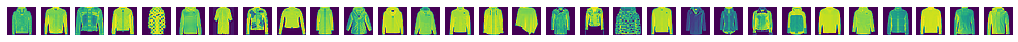

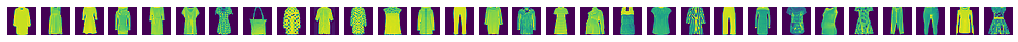

In [131]:
a = 4
b = 9

d = 30

l = 2000
h = 5000

m = 0
plt.figure(figsize=(18,12))
for i in range(l,h):
    if y_test[i] == a:
        ax = plt.subplot(2,d,m+1)
        plt.imshow(X_test[i])
        ax.set_axis_off()
        m += 1
    if m == d:
        break
plt.show()

m = 0
plt.figure(figsize=(18,12))
for i in range(l,h):
    if conv_k_pred[i] == b:
        ax = plt.subplot(2,d,m+1)
        plt.imshow(X_test[i])
        ax.set_axis_off()
        m += 1
    if m == d:
        break
plt.show()

In [135]:
conv_k_mod_pred = []
for i in conv_k_pred:
    if i == 0:
        conv_k_mod_pred.append(0)
    elif i == 1:
        conv_k_mod_pred.append(9)
    elif i == 2:
        conv_k_mod_pred.append(8)
    elif i == 3:
        conv_k_mod_pred.append(1)
    elif i == 4:
        conv_k_mod_pred.append(9)
    elif i == 5:
        conv_k_mod_pred.append(5)
    elif i == 6:
        conv_k_mod_pred.append(6)
    elif i == 7:
        conv_k_mod_pred.append(4)
    elif i == 8:
        conv_k_mod_pred.append(0)
    elif i == 9:
        conv_k_mod_pred.append(3)

In [136]:
conv_k_loss = get_loss(y_test,conv_k_mod_pred)

In [137]:
conv_k_loss

'Loss: 5168'

In [138]:
conv_k_accuracy = get_accuracy(y_test,conv_k_mod_pred)

In [139]:
conv_k_accuracy

'Accuracy: 0.4832'

In [140]:
clusters.__fit__(encoded_conv_data,'gmm')

In [175]:
conv_gmm_pred = clusters.__predict__(encoded_conv_data,'gmm')

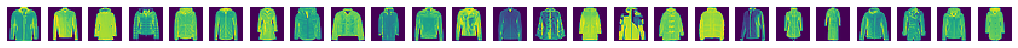

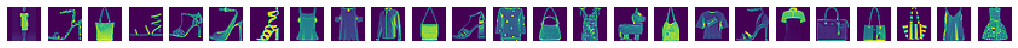

In [176]:
a = 4
b = 4

d = 25

l = 1000
h = 10000

m = 0
plt.figure(figsize=(18,12))
for i in range(l,h):
    if y_test[i] == a:
        ax = plt.subplot(2,d,m+1)
        plt.imshow(X_test[i])
        ax.set_axis_off()
        m += 1
    if m == d:
        break
plt.show()

m = 0
plt.figure(figsize=(18,12))
for i in range(l,h):
    if conv_gmm_pred[i] == b:
        ax = plt.subplot(2,d,m+1)
        plt.imshow(X_test[i])
        ax.set_axis_off()
        m += 1
    if m == d:
        break
plt.show()

In [177]:
conv_gmm_mod_pred = []
for i in conv_gmm_pred:
    if i == 0:
        conv_gmm_mod_pred.append(8)
    elif i == 1:
        conv_gmm_mod_pred.append(4)
    elif i == 2:
        conv_gmm_mod_pred.append(9)
    elif i == 3:
        conv_gmm_mod_pred.append(3)
    elif i == 4:
        conv_gmm_mod_pred.append(5)
    elif i == 5:
        conv_gmm_mod_pred.append(7)
    elif i == 6:
        conv_gmm_mod_pred.append(0)
    elif i == 7:
        conv_gmm_mod_pred.append(8)
    elif i == 8:
        conv_gmm_mod_pred.append(9)
    elif i == 9:
        conv_gmm_mod_pred.append(1)

In [178]:
conv_gmm_loss = get_loss(y_test,conv_gmm_mod_pred)
conv_gmm_accuracy = get_accuracy(y_test,conv_gmm_mod_pred)

In [179]:
conv_gmm_loss

'Loss: 4443'

In [180]:
conv_gmm_accuracy

'Accuracy: 0.5557'